# Análisis exploratorio de "Encuesta de percepción sobre salud mental durante la cuarentena por COVID - 19 en Bogotá"
Podrás descargar este dataset en https://www.datos.gov.co/dataset/Encuesta-de-percepci-n-sobre-salud-mental-durante-/2pwg-teum/about_data

In [72]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import missingno as msn
from column_dictionary import questions
import warnings
warnings.filterwarnings("ignore")

Esta es una extensión de Pandas que se encuentra en esta misma carpeta para tratar los datos faltantes.

In [73]:
%run pandas-missing-extension.ipynb

Procesanmdo el csv que contiene el Dataset, este se encuentra separado por ";"

In [74]:
df = pd.read_csv(
    "./data/base_saludmental.csv",
    sep=";"
)

Mostrando primeros 5 registros del Dataset

In [75]:
df.head()

,Marca temporal,"1. Para empezar, nos gustaría saber qué tanto confía en la gente de su manzana o vecindario. Podría decir que entre sus vecinos usted confía en:","2. ¿Durante el mes pasado, qué tan seguido habló con sus vecinos?","3. ¿En un mes normal, antes de que comenzara el confinamiento en Bogotá a causa del COVID-19, con qué frecuencia hablaba con sus vecinos?","4. ¿Durante el mes pasado, qué tan seguido habló con sus amigos y familiares (incluyendo medios electrónicos como chats, redes sociales, llamadas telefónicas, videollamadas, etc.)?","5. En un mes normal, antes de que comenzara el confinamiento en Bogotá a causa del COVID-19, ¿con qué frecuencia hablaba con sus amigos y familiares (incluyendo medios electrónicos como chats, redes sociales, llamadas telefónicas, videollamadas, etc.)?","6. El gobierno ha promovido medidas de autocuidado (cuidarse a usted mismo) como el aislamiento social, el uso de tapabocas, el lavado de manos y mantener el distanciamiento físico. En una escala de 1 a 5, donde 1 equivale a ""nada"" y 5 a ""totalmente"": [¿Considera que usted ha cumplido con las medidas de autocuidado?]","6. El gobierno ha promovido medidas de autocuidado (cuidarse a usted mismo) como el aislamiento social, el uso de tapabocas, el lavado de manos y mantener el distanciamiento físico. En una escala de 1 a 5, donde 1 equivale a ""nada"" y 5 a ""totalmente"": [¿Considera que sus familiares han cumplido con las medidas de autocuidado?]","6. El gobierno ha promovido medidas de autocuidado (cuidarse a usted mismo) como el aislamiento social, el uso de tapabocas, el lavado de manos y mantener el distanciamiento físico. En una escala de 1 a 5, donde 1 equivale a ""nada"" y 5 a ""totalmente"": [¿Considera que sus vecinos han cumplido con las medidas de autocuidado?]","7. Para usted, la estrategia de comunicación y la información presentada por la alcaldía en relación con el COVID-19 hasta este momento ha sido: [Clara]",...,"29. ¿Contándose a usted mismo, cuántas personas viven en su hogar?","30. ¿Contándose a usted mismo, y según la edad de cada uno, cuántas personas viven en su hogar? [De 5 años o menos]","30. ¿Contándose a usted mismo, y según la edad de cada uno, cuántas personas viven en su hogar? [Entre 6 y 18 años]","30. ¿Contándose a usted mismo, y según la edad de cada uno, cuántas personas viven en su hogar? [Entre 19 y 64 años]","30. ¿Contándose a usted mismo, y según la edad de cada uno, cuántas personas viven en su hogar? [De 65 años o más]",17. ¿Considera que ha tenido la oportunidad de expresarle cómo se siente a otras personas?,"16. ¿Durante el último mes, con qué frecuencia ha realizado actividades físicas como bailar o practicar algún deporte?","28. ¿En una escala de 1 a 5 donde 1 significa ""nada"" y 5 significa ""mucho"", siente que en su casa usted está expuesto a algún tipo de violencia?",19. ¿Usted o alguna de las personas con las que vive ha sido diagnósticado con alguna enfermedad de salud mental que requiera tratamiento?,"20. En caso de que la respuesta a la pregunta anterior sea ""Sí"", ¿ha podido continuar el tratamiento durante el periodo de cuarentena?"
0,"44018,34521",La mayoría,Nada,Algunas veces al mes,Casi todos los días,Algunas veces a la semana,5 Totalmente,5 Totalmente,5 Totalmente,Sí,...,Cuatro,Una,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
1,"44018,34595",Algunos,Nada,Nada,Casi todos los días,Algunas veces al mes,5 Totalmente,4,3,No,...,Dos,Ninguna,Ninguna,Una,Ninguna,Sí,Menos de una vez a la semana,1.0,Sí,Sí
2,"44018,34611",Algunos,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,5 Totalmente,3,Sí,...,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Más de una vez a la semana,1.0,No,No aplica
3,"44018,35482",La mayoría,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,4,4,Sí,...,Cuatro,Ninguna,Ninguna,Cuatro,Ninguna,Sí,Más de una vez a la semana,1.0,Sí,No
4,"44018,35899",La mayoría,A

Mostrando dimensiones del dataset

In [76]:
df.shape

(4998, 55)

Dado que dejar el encabezado de la pregunta es demasiado largo para ser un nombre de columna, he creado un diccionario en **column_dictionary.py** para representar las preguntas con nombres de variable.

In [77]:
new_columns = [questions[col_name] for col_name in df.columns]
df. columns = new_columns
df.head()

,timestamp,confianza_vecinos,frecuencia_habla_vecinos_mes_pasado,frecuencia_habla_vecinos_mes_normal,frecuencia_habla_amigos_familia_mes_pasado,frecuencia_habla_amigos_familia_mes_normal,cumplimiento_autocuidado_personal,cumplimiento_autocuidado_familiares,cumplimiento_autocuidado_vecinos,estrategia_comunicacion_clara,...,num_personas_hogar,num_personas_5_menos,num_personas_6_18,num_personas_19_64,num_personas_65_mas,oportunidad_expresar_sentimientos,frecuencia_actividad_fisica_mes,exposicion_violencia_hogar,diagnostico_salud_mental,continuidad_tratamiento_salud_mental
0,"44018,34521",La mayoría,Nada,Algunas veces al mes,Casi todos los días,Algunas veces a la semana,5 Totalmente,5 Totalmente,5 Totalmente,Sí,...,Cuatro,Una,Una,Dos,Ninguna,Sí,Ninguna vez,1.0,No,No aplica
1,"44018,34595",Algunos,Nada,Nada,Casi todos los días,Algunas veces al mes,5 Totalmente,4,3,No,...,Dos,Ninguna,Ninguna,Una,Ninguna,Sí,Menos de una vez a la semana,1.0,Sí,Sí
2,"44018,34611",Algunos,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,5 Totalmente,3,Sí,...,Tres,Ninguna,Ninguna,Tres,Ninguna,Sí,Más de una vez a la semana,1.0,No,No aplica
3,"44018,35482",La mayoría,Algunas veces a la semana,Algunas veces a la semana,Casi todos los días,Casi todos los días,5 Totalmente,4,4,Sí,...,Cuatro,Ninguna,Ninguna,Cuatro,Ninguna,Sí,Más de una vez a la semana,1.0,Sí,No
4,"44018,35899",La mayoría,Algunas veces al mes,Algunas veces al mes,Algunas veces a la semana,Algunas veces a la semana,4,4,4,Sí,...,Una (vivo solo),Ninguna,Ninguna,Una,Ninguna,Sí,Una vez a la semana,1.0,No,No aplica


## Datos faltantes

A continuación, podemos representar cuantos registros cuentan con X número de variables faltantes. Por lo menos 3.500 no cuentan con datos nulos, no obstante, esta cifra es un 70% del dataset por lo que no podemos eliminar los datos nulos ya que perderíamos información valiosa.

Al menos 1.000 registros tienen 1 datos nulos y menos de 200 tienen 2 o más datos nulos. Voy a revisar cuanto representa en porcentaje de nulidad con respecto a cada campo.

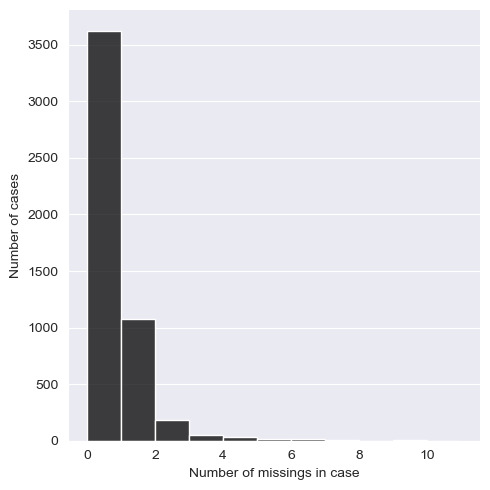

In [78]:
df.missing.missing_case_plot()

Para revisar que produce tantos datos nulos, podemos usar la extensión al paquete de pandas con Missingno, que nos permite ver un summary de cada variable en relación con los datos nulos.

In [79]:
missing_values_summary = df.missing.missing_variable_summary()
missing_values_summary = missing_values_summary[missing_values_summary['n_missing'] > 0].reset_index()
missing_values_summary.sort_values('n_missing', ascending=False, inplace=True)
missing_values_summary

,index,variable,n_missing,n_cases,pct_missing
29,54,continuidad_tratamiento_salud_mental,887,4998,17.747099
10,30,apoyo_pareja_cuarentena,310,4998,6.202481
13,33,apoyo_empleador_entidad_educativa_cuarentena,154,4998,3.081232
16,36,apoyo_gobierno_nacional_cuarentena,84,4998,1.680672
14,34,apoyo_vecinos_cuarentena,81,4998,1.620648
15,35,apoyo_alcaldia_cuarentena,74,4998,1.480592
12,32,apoyo_amigos_cuarentena,59,4998,1.180472
19,39,rango_edad,26,4998,0.520208
25,50,oportunidad_expresar_sentimientos,25,4998,0.500200
6,15,sabe_actuar_sospechas_contagio,20,4998,0.400160


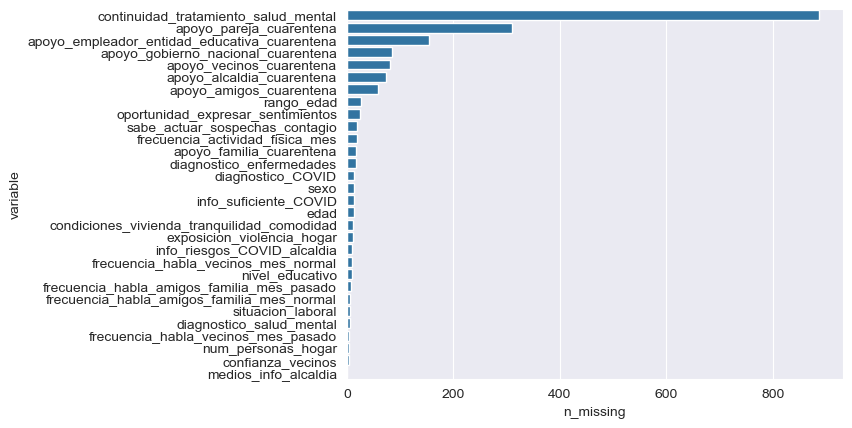

In [80]:
sns.barplot(
    x=missing_values_summary['n_missing'],
    y=missing_values_summary['variable']
)
plt.show()

Aquí podemos ver que un 17.74% no contestó la variable **continuidad_tratamiento_salud_mental** que corresponde a **20. En caso de que la respuesta a la pregunta anterior sea "Sí", ¿ha podido continuar el tratamiento durante el periodo de cuarentena?**, pero también podemos ver que esta depende de la pregunta anterior **19. ¿Usted o alguna de las personas con las que vive ha sido diagnosticado con alguna enfermedad de salud mental que requiera tratamiento?** el cual solo un 0.12% no respondió esa pregunta, lo que no hace relevante que este 17.74% haya omitido esta pregunta, ya que un 80.92% respondió que no y un 6.12% respondió que no está seguro.

In [81]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

continuidad_tratamiento_salud_mental            887
apoyo_pareja_cuarentena                         310
apoyo_empleador_entidad_educativa_cuarentena    154
apoyo_gobierno_nacional_cuarentena               84
apoyo_vecinos_cuarentena                         81
apoyo_alcaldia_cuarentena                        74
apoyo_amigos_cuarentena                          59
rango_edad                                       26
oportunidad_expresar_sentimientos                25
sabe_actuar_sospechas_contagio                   20
frecuencia_actividad_fisica_mes                  19
apoyo_familia_cuarentena                         18
diagnostico_enfermedades                         17
diagnostico_COVID                                14
sexo                                             13
edad                                             13
info_suficiente_COVID                            13
condiciones_vivienda_tranquilidad_comodidad      12
exposicion_violencia_hogar                       12
info_riesgos

Para los datos faltantes de la continuidad del tratamiento de salud, imputaremos no aplica si el resultado de la variable de diagnóstico es negativo, sí la variable de diagnóstico es positiva, imputaremos el valor moda de la variable de continuidad dado que la de diagnóstico sea positiva.

In [82]:
df['continuidad_tratamiento_salud_mental'] = (
    df
    .apply(
        lambda row: 'No aplica' if row['diagnostico_salud_mental'] != 'Sí' else row['continuidad_tratamiento_salud_mental'], 
        axis=1
    )
)


In [83]:
moda_continuidad_si_diagnostico = df[df['diagnostico_salud_mental']=='Sí']['continuidad_tratamiento_salud_mental'].mode()[0]
moda_continuidad_si_diagnostico

'Sí'

In [84]:
df['continuidad_tratamiento_salud_mental'] = (
    df
    .apply(
        lambda row: 
        moda_continuidad_si_diagnostico
        if row['diagnostico_salud_mental'] == 'Sí' and pd.isnull(row['continuidad_tratamiento_salud_mental'])  
        else row['continuidad_tratamiento_salud_mental'],
        axis=1
    )
)


Esta función imputará los valores faltantes con la moda en dado caso de ser datos categóricos o con la media en dado caso de ser datos numéricos

In [85]:
for col in df.columns:
    tipo = df[col].dtype
    if tipo == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    elif tipo == 'float64' or tipo == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)


Ahora podemos ver que con la matriz de Missingno, ya no tenemos datos nulos, ya que solo el caso de la continuidad del tratamiento tenía una correlación con la variable anterior, para todas las demás debido a que su peso es un porcentaje bajo no superando el 7%, he decidido imputar por el promedio o la moda dependiendo si el dato es categórico o numérico. 



In [86]:
variables_missing = missing_values_summary.variable.to_list()

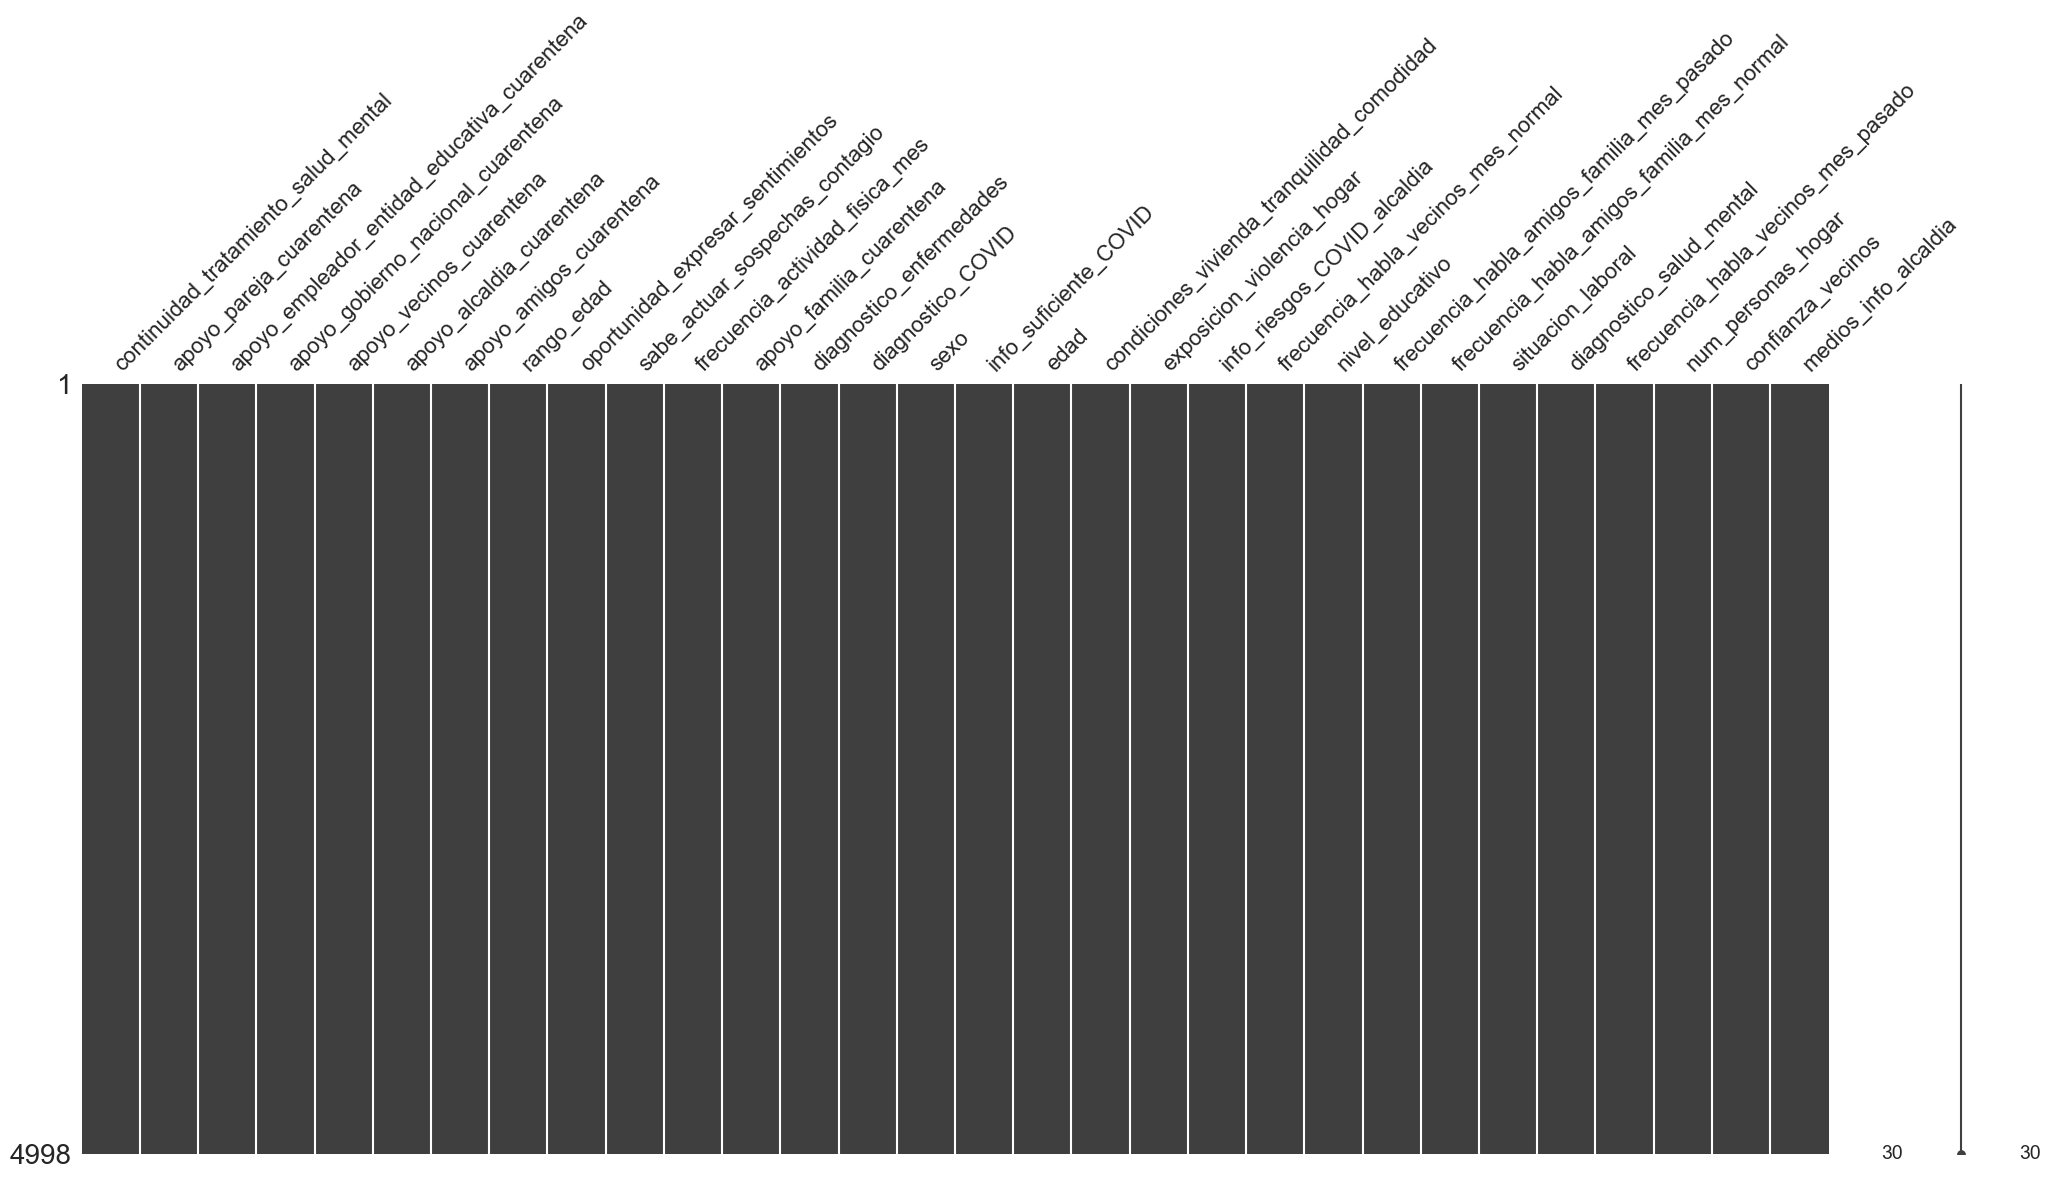

In [87]:
msn.matrix(df=df[variables_missing])
plt.show()

In [89]:
df.to_csv(os.path.join(os.getcwd(),"data","base_saludmental-sin-faltantes.csv"), index=False, sep=";")

Fin de primera limpieza de datos


## Funciones Utilities

Función para devolver el nombre llave del diccionario Questions

In [17]:
def get_key_from_questions(val):
    for key, value in questions.items():
        if value == val:
            return key
    return None

In [18]:
df = df[df['diagnostico_salud_mental']=='Sí']

Función para mostrar la distribución de una variable

In [19]:
def show_distribution(col):
    column = list(questions.values())[col]
    question = get_key_from_questions(column)
    
    print(f"\nNombre de variable: {column}",sep='\n')
    
    value_counts = df[column].value_counts(normalize=True).sort_values(ascending=False) * 100
    
    for index, value in value_counts.items():
        print(f'{index}: {value:.2f}%')
    
    plot_data = pd.DataFrame({
        'valores_unicos': value_counts.index,
        'porcentajes': value_counts.values
    })
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='valores_unicos', y='porcentajes', data=plot_data)
    
    plt.xlabel(column)
    plt.title(textwrap.fill(question, 100))
    
    wrapped_labels = [textwrap.fill(item, 10) for item in plot_data['valores_unicos']]
    ax.set_xticklabels(wrapped_labels, rotation=0)
    
    plt.show()



Nombre de variable: confianza_vecinos
Algunos: 49.07%
La mayoría: 24.61%
Ninguno: 23.22%
Todos: 3.10%


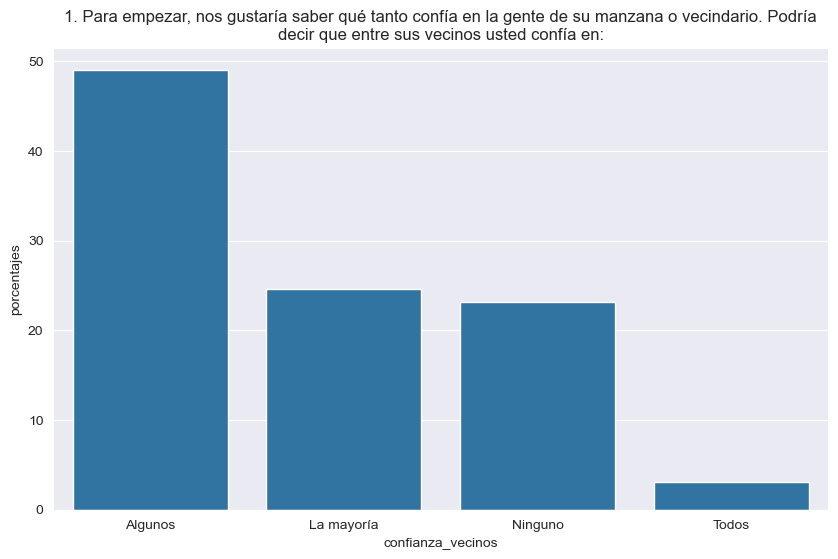

In [20]:
show_distribution(1)

In [21]:
df_confiados = df[(df['confianza_vecinos'] == 'Ninguno')&(df['diagnostico_salud_mental']=='Sí')].shape[0]/df.shape[0]*100
print(df_confiados)

23.219814241486066



Nombre de variable: frecuencia_habla_vecinos_mes_pasado
Nada: 38.54%
Algunas veces al mes: 26.78%
Una vez: 21.36%
Algunas veces a la semana: 10.68%
No está seguro: 1.39%
Casi todos los días: 1.24%


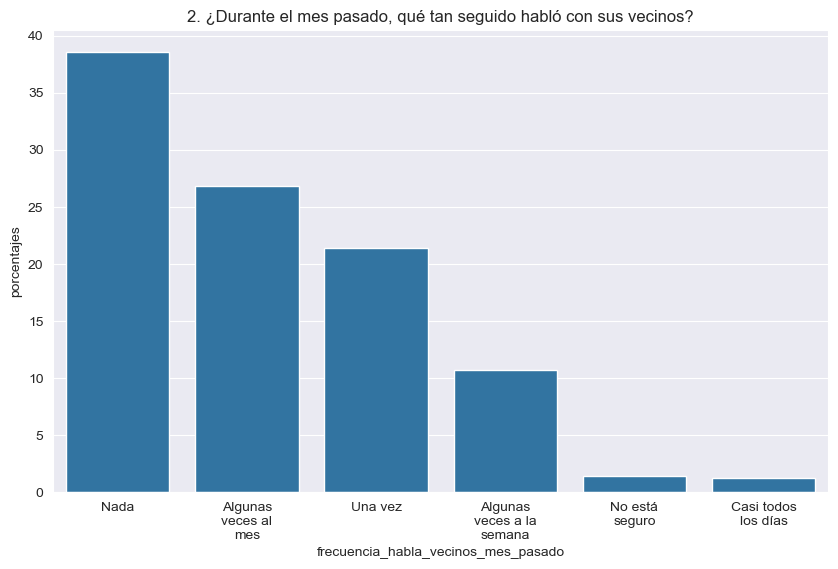

In [22]:
show_distribution(2)


Nombre de variable: frecuencia_habla_vecinos_mes_normal
Algunas veces al mes: 30.50%
Nada: 22.91%
Algunas veces a la semana: 22.60%
Una vez: 11.15%
Casi todos los días: 10.37%
No está seguro: 2.48%


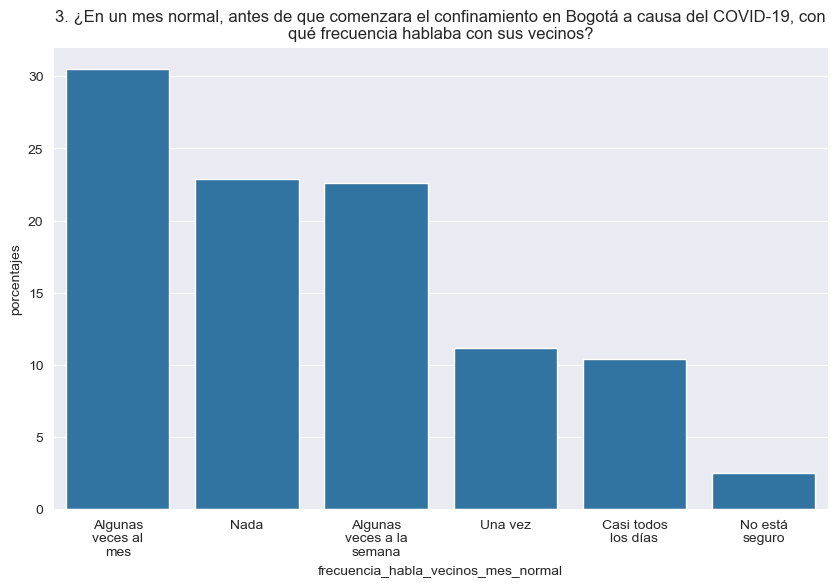

In [23]:
show_distribution(3)


Nombre de variable: frecuencia_habla_amigos_familia_mes_pasado
Casi todos los días: 52.79%
Algunas veces a la semana: 27.24%
Algunas veces al mes: 16.10%
Una vez: 2.01%
Nada: 1.55%
No está seguro: 0.31%


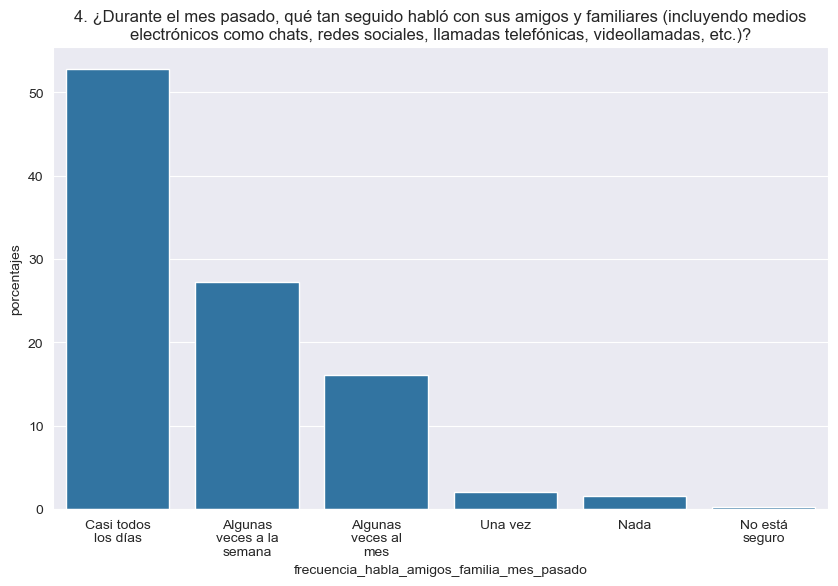

In [24]:
show_distribution(4)


Nombre de variable: frecuencia_habla_amigos_familia_mes_normal
Casi todos los días: 54.95%
Algunas veces a la semana: 31.73%
Algunas veces al mes: 10.37%
Una vez: 2.48%
Nada: 0.46%


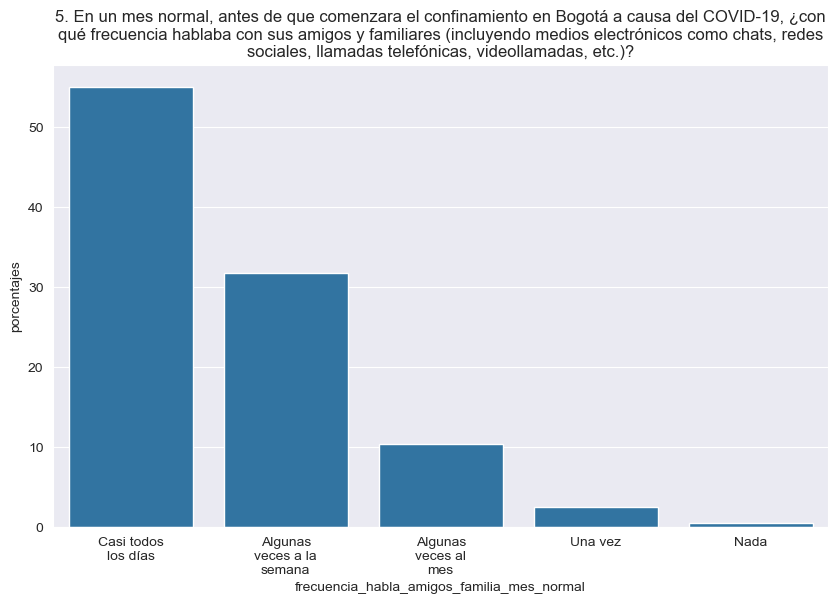

In [25]:
show_distribution(5)


Nombre de variable: cumplimiento_autocuidado_personal
5 Totalmente: 61.15%
4: 23.53%
3: 12.54%
2: 2.48%
1 Nada: 0.31%


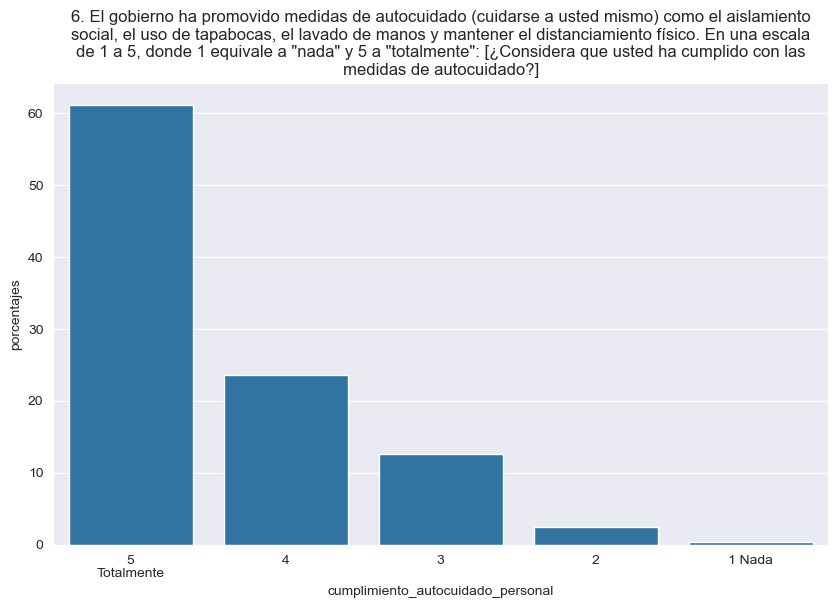

In [26]:
show_distribution(6)


Nombre de variable: cumplimiento_autocuidado_familiares
5 Totalmente: 43.65%
4: 33.13%
3: 16.87%
2: 5.57%
1 Nada: 0.77%


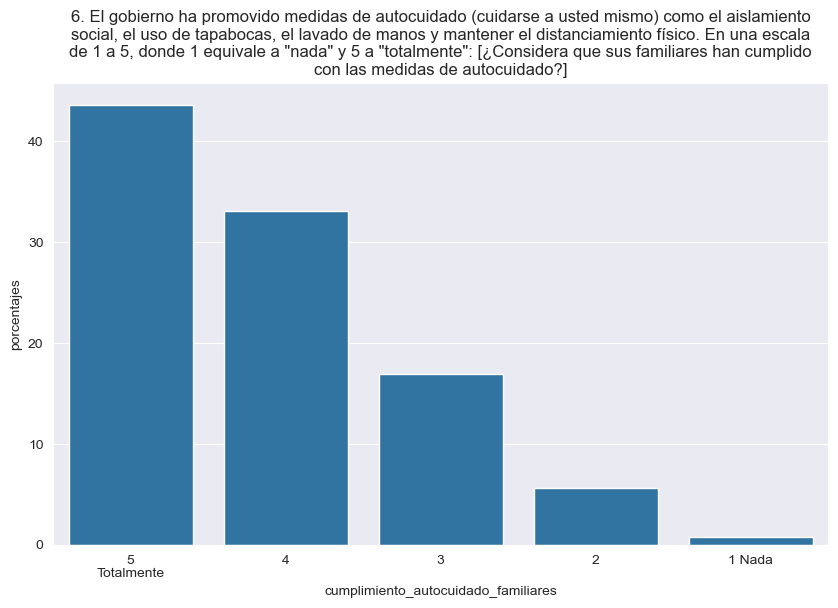

In [27]:
show_distribution(7)


Nombre de variable: cumplimiento_autocuidado_vecinos
3: 33.28%
4: 25.54%
2: 22.60%
1 Nada: 11.15%
5 Totalmente: 7.43%


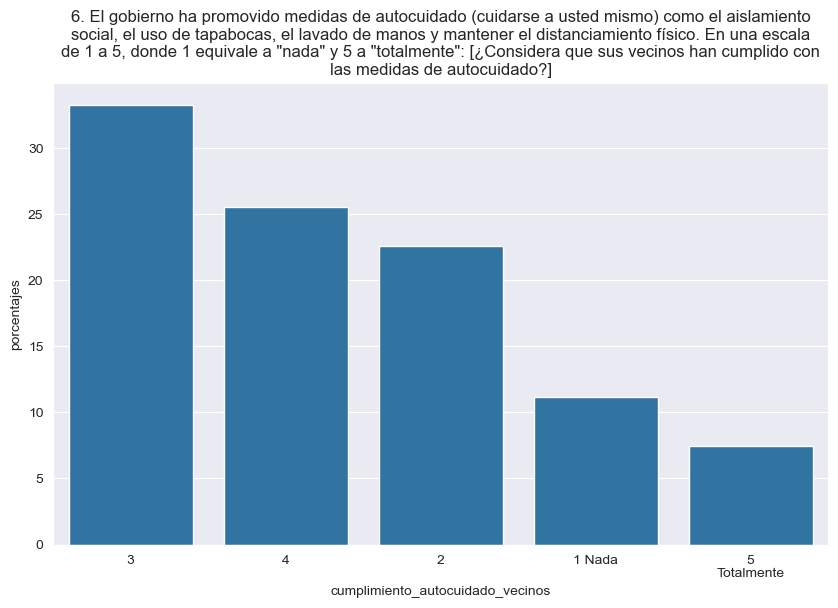

In [28]:
show_distribution(8)


Nombre de variable: estrategia_comunicacion_clara
Sí: 63.93%
No: 28.33%
No sabe: 7.74%


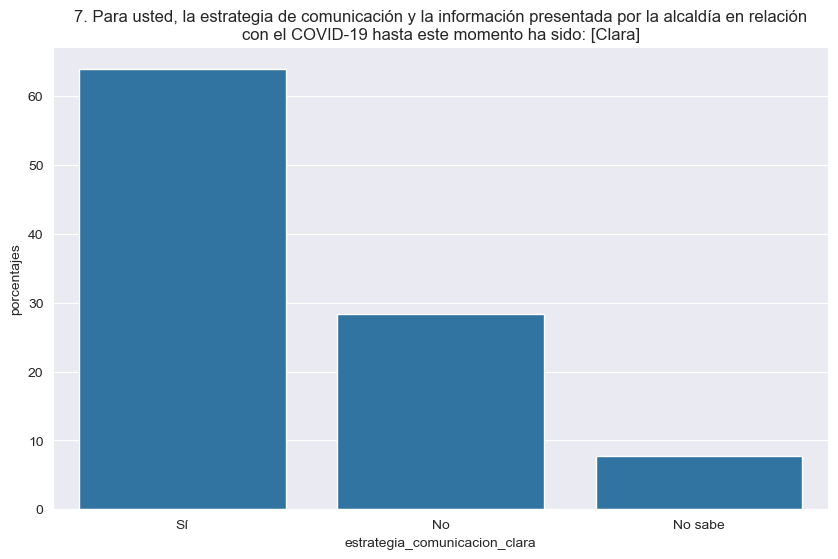

In [29]:
show_distribution(9)


Nombre de variable: estrategia_comunicacion_suficiente
Sí: 50.31%
No: 39.63%
No sabe: 10.06%


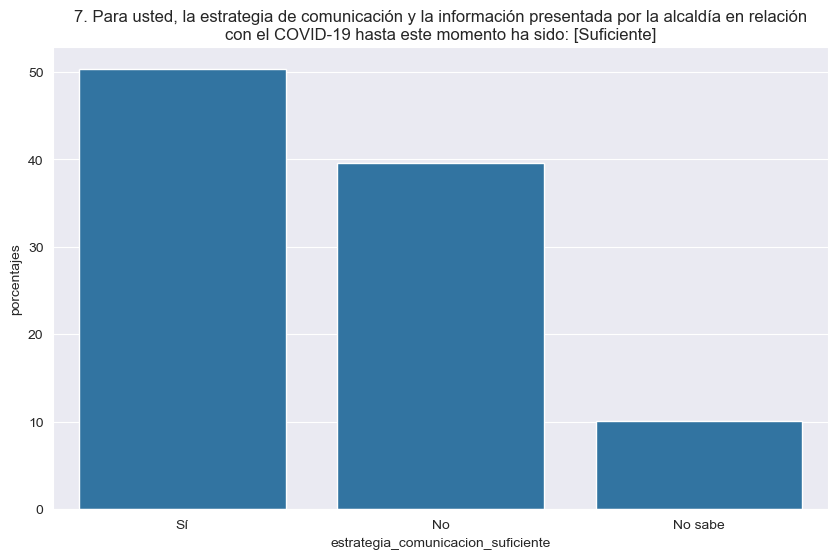

In [30]:
show_distribution(10)


Nombre de variable: estrategia_comunicacion_veridica
Sí: 52.79%
No sabe: 25.23%
No: 21.98%


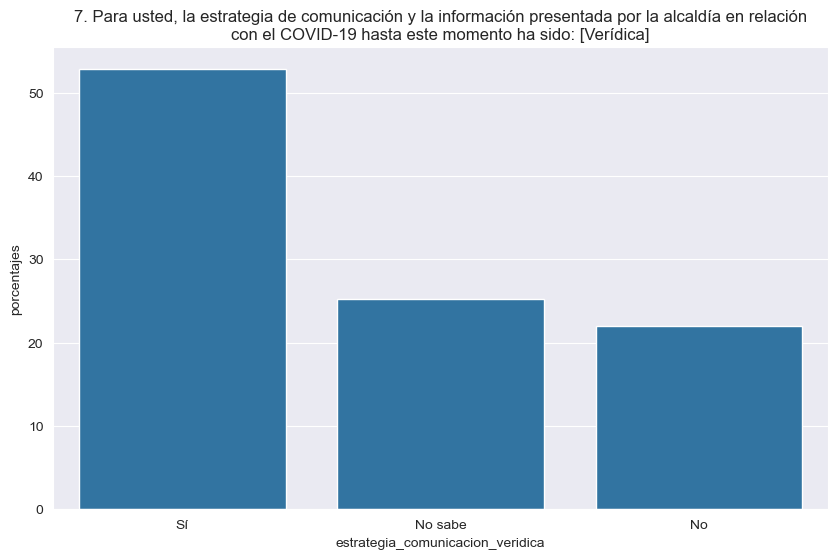

In [31]:
show_distribution(11)


Nombre de variable: estrategia_comunicacion_oportuna
Sí: 67.18%
No: 23.07%
No sabe: 9.75%


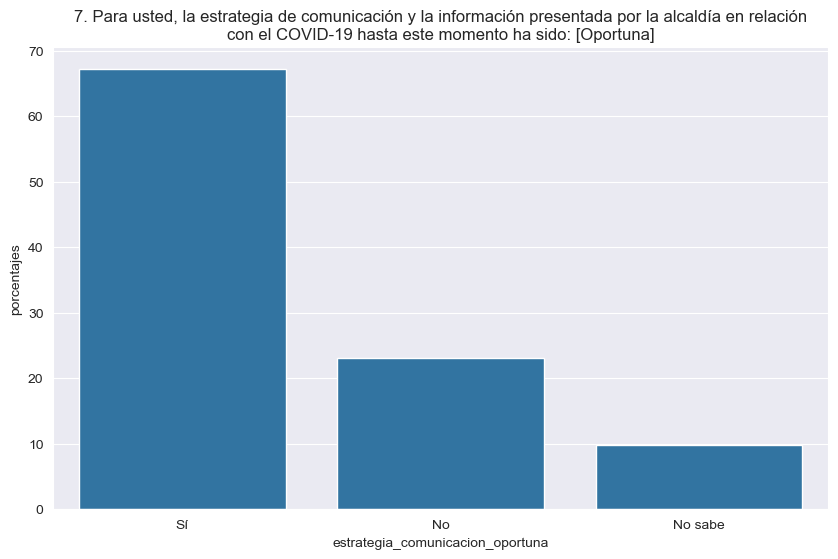

In [32]:
show_distribution(12)


Nombre de variable: estrategia_comunicacion_contradictoria
No: 54.49%
Sí: 35.14%
No sabe: 10.37%


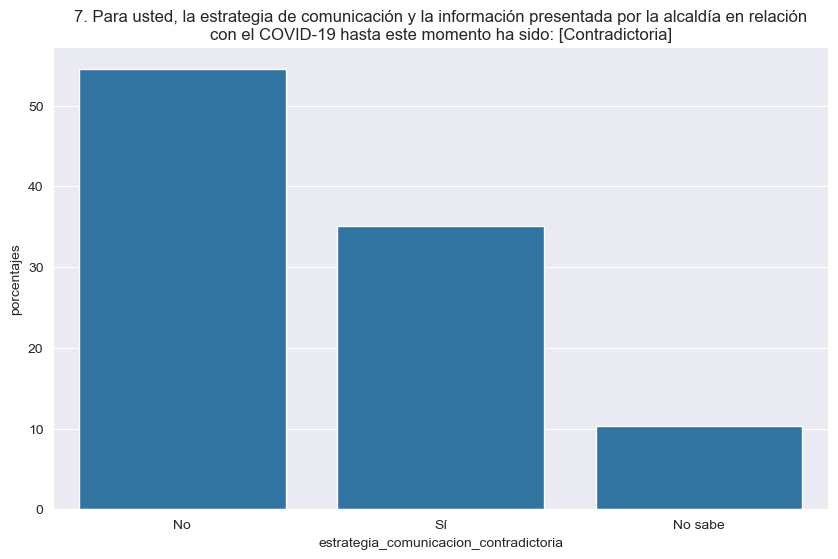

In [33]:
show_distribution(13)

In [34]:
column = list(questions.values())[14]
get_key_from_questions(column)

'8. ¿Por qué medio o medios se entera usted de las decisiones tomadas por la Alcaldía frente al manejo del COVID-19? Puede marcar varias opciones'


Nombre de variable: sabe_actuar_sospechas_contagio
Sí: 80.80%
No: 19.20%


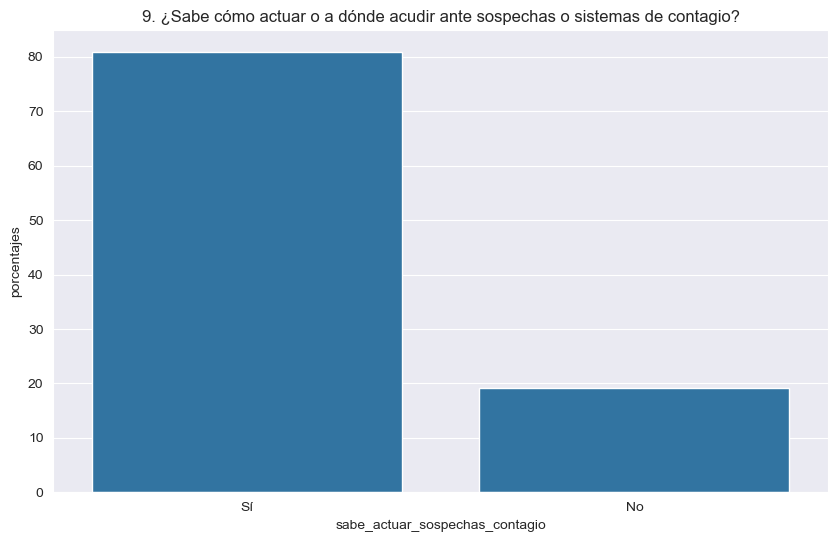

In [35]:
show_distribution(15)


Nombre de variable: info_suficiente_COVID
Sí: 81.42%
No: 18.58%


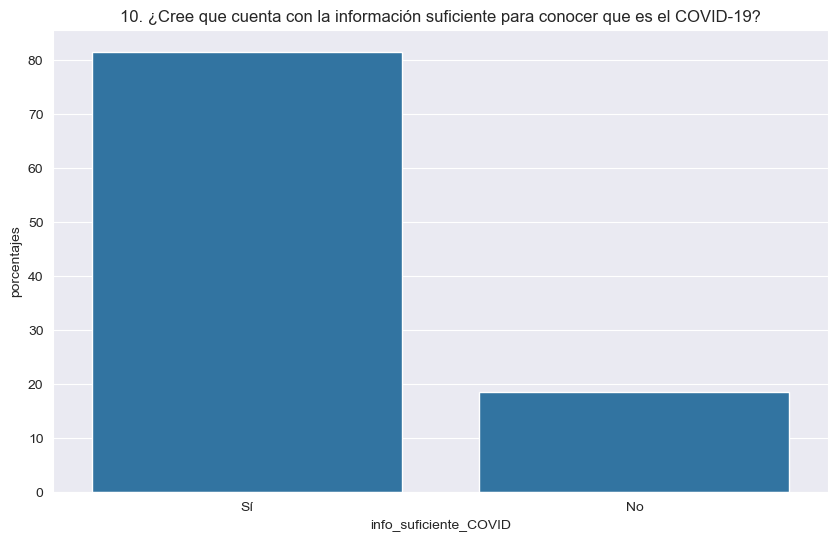

In [36]:
show_distribution(16)


Nombre de variable: info_riesgos_COVID_alcaldia
Precisa: 69.81%
Minimizada: 19.04%
Exagerada: 11.15%


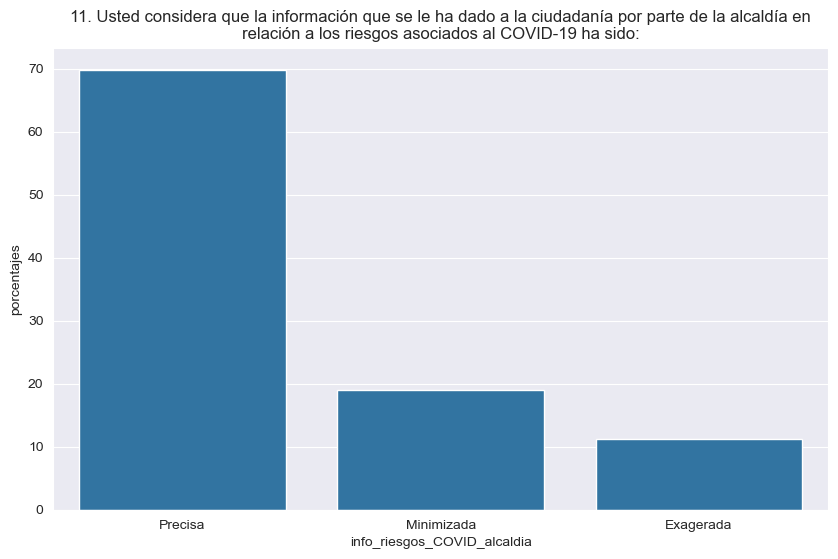

In [37]:
show_distribution(17)


Nombre de variable: diagnostico_COVID
No: 75.85%
Sí: 24.15%


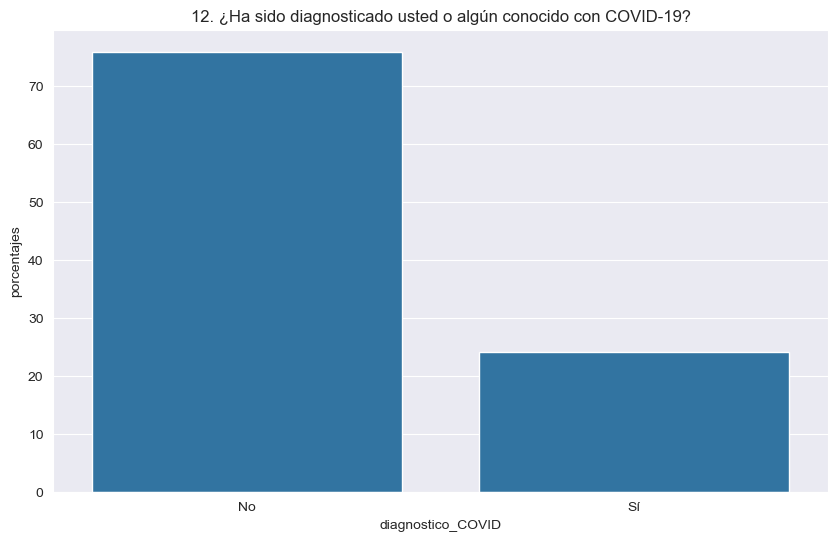

In [38]:
show_distribution(18)


Nombre de variable: ansiedad_cuarentena
Mucho más que antes: 42.41%
Un poco más que antes: 28.17%
Igual que antes: 14.40%
Mucho menos que antes: 7.59%
Un poco menos que antes: 7.43%


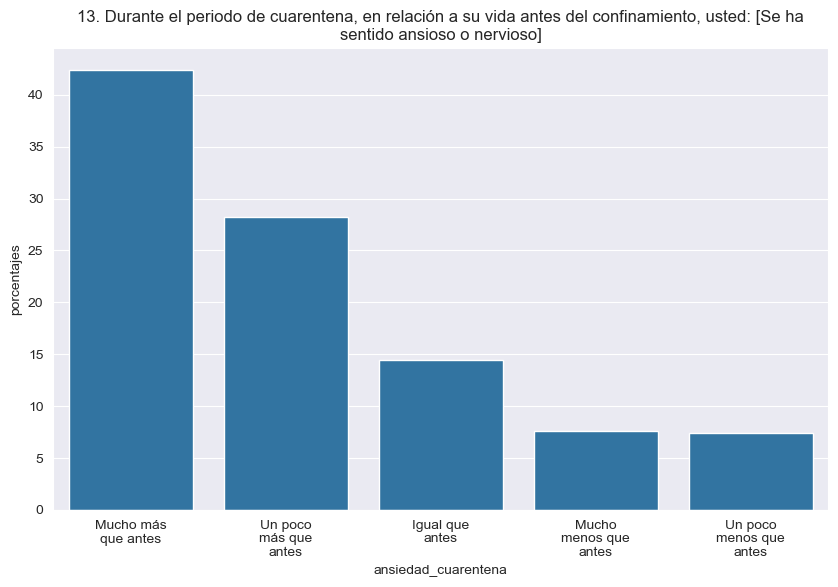

In [39]:
show_distribution(19)


Nombre de variable: depresion_cuarentena
Mucho más que antes: 35.91%
Un poco más que antes: 30.03%
Igual que antes: 19.20%
Un poco menos que antes: 7.74%
Mucho menos que antes: 7.12%


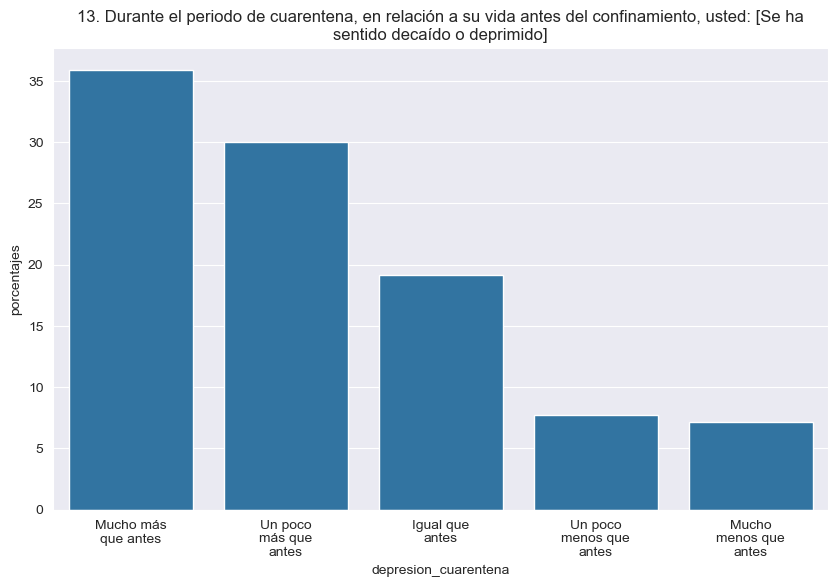

In [40]:
show_distribution(20)


Nombre de variable: tranquilidad_cuarentena
Mucho menos que antes: 41.95%
Un poco menos que antes: 27.24%
Igual que antes: 14.86%
Mucho más que antes: 8.36%
Un poco más que antes: 7.59%


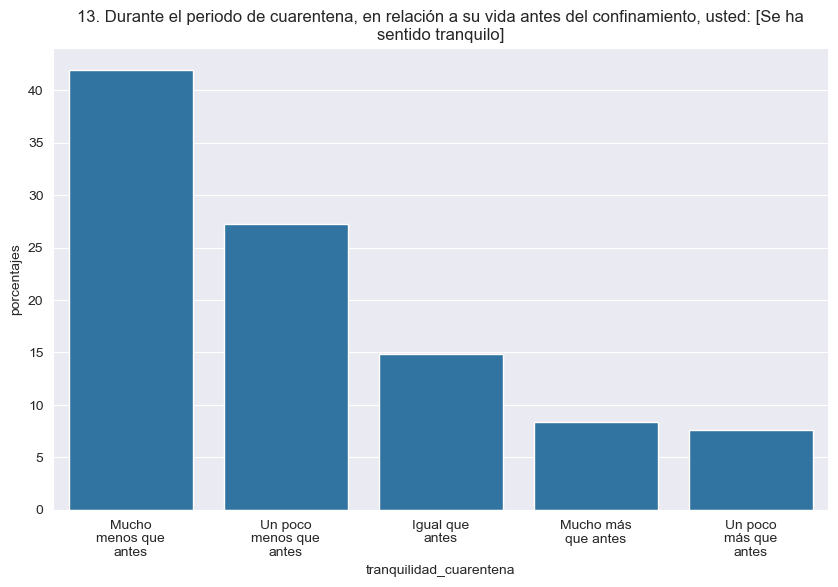

In [41]:
show_distribution(21)


Nombre de variable: cercania_convive_cuarentena
Igual que antes: 28.17%
Mucho más que antes: 24.61%
Un poco más que antes: 20.90%
Mucho menos que antes: 14.40%
Un poco menos que antes: 11.92%


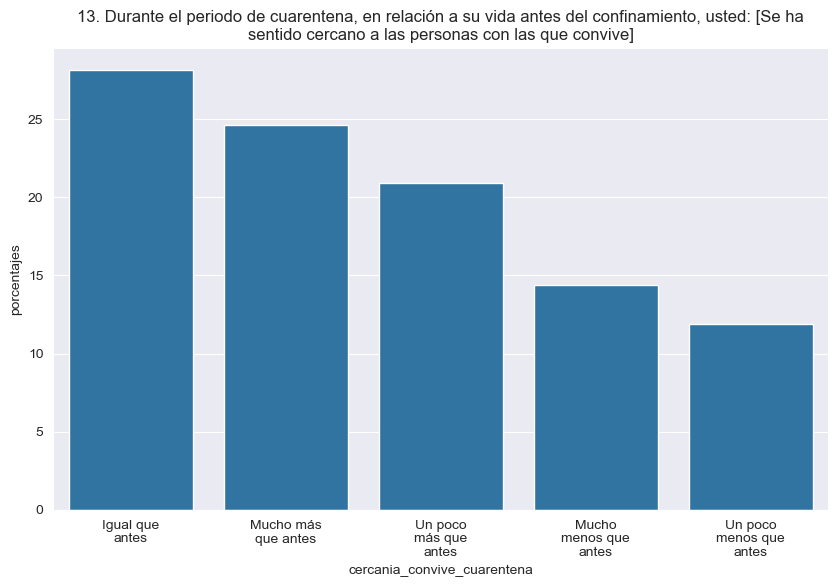

In [42]:
show_distribution(22)


Nombre de variable: interes_placer_cuarentena
Un poco menos que antes: 27.40%
Igual que antes: 26.78%
Mucho menos que antes: 25.85%
Un poco más que antes: 11.61%
Mucho más que antes: 8.36%


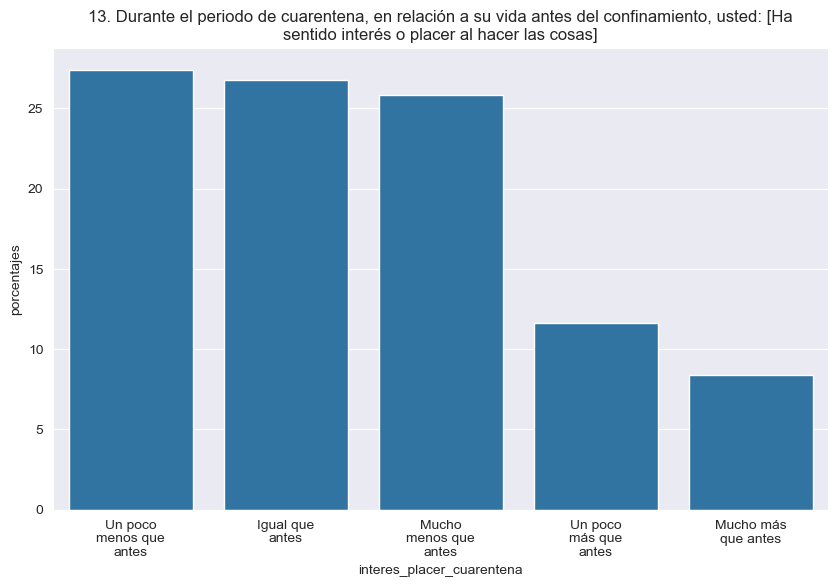

In [43]:
show_distribution(23)


Nombre de variable: problemas_dormir_cuarentena
Mucho más que antes: 36.07%
Un poco más que antes: 24.46%
Igual que antes: 21.98%
Mucho menos que antes: 9.29%
Un poco menos que antes: 8.20%


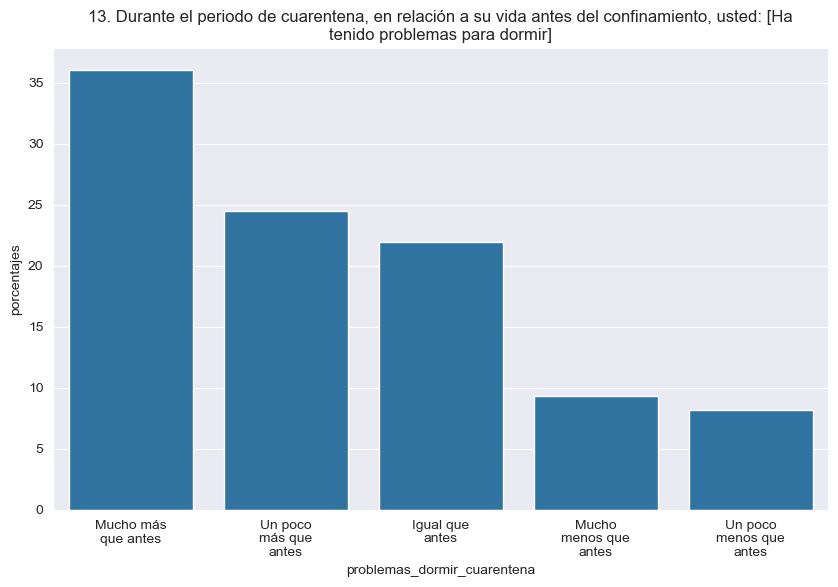

In [44]:
show_distribution(24)


Nombre de variable: desacuerdos_convive_cuarentena
Igual que antes: 33.13%
Un poco más que antes: 23.53%
Un poco menos que antes: 16.10%
Mucho más que antes: 14.09%
Mucho menos que antes: 13.16%


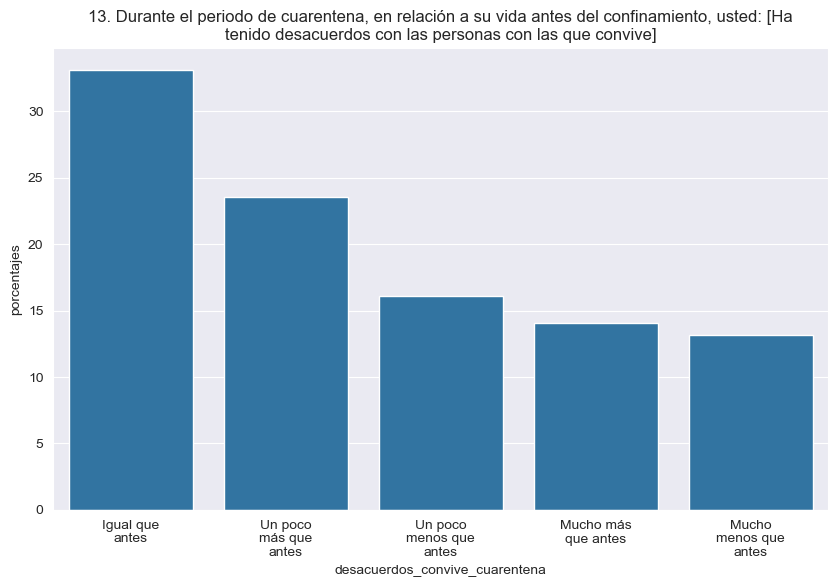

In [45]:
show_distribution(25)


Nombre de variable: necesidad_alcohol_cuarentena
No consumo: 39.16%
Igual que antes: 21.52%
Mucho menos que antes: 14.71%
Un poco más que antes: 11.61%
Un poco menos que antes: 7.59%
Mucho más que antes: 5.42%


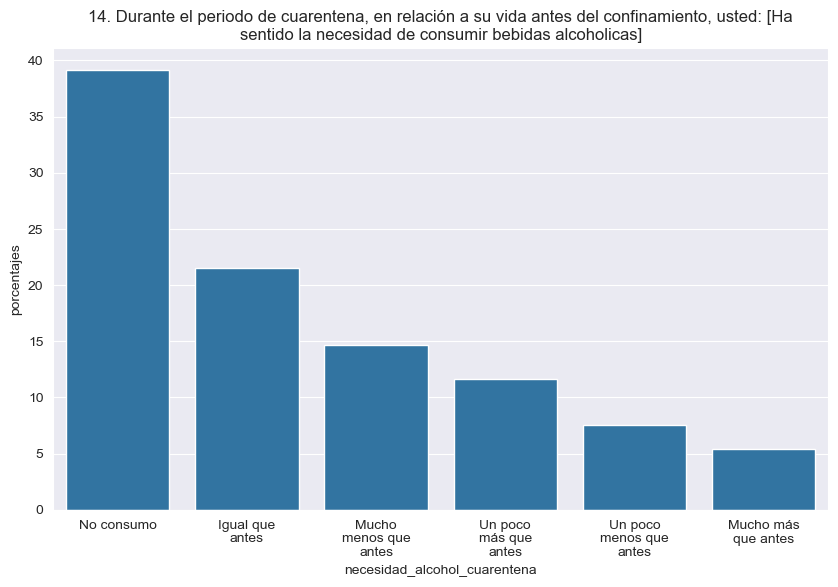

In [46]:
show_distribution(26)


Nombre de variable: necesidad_fumar_cuarentena
No consumo: 54.02%
Igual que antes: 15.17%
Mucho menos que antes: 14.40%
Mucho más que antes: 7.74%
Un poco más que antes: 5.42%
Un poco menos que antes: 3.25%


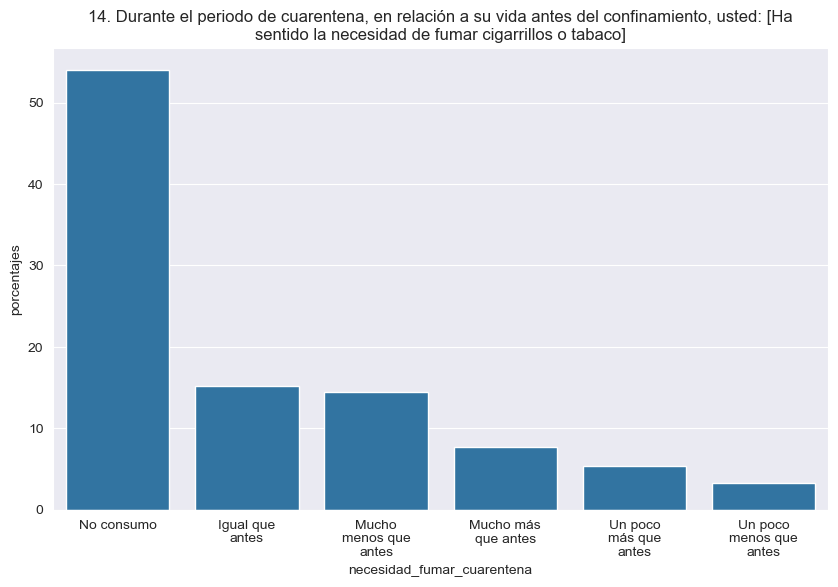

In [47]:
show_distribution(27)


Nombre de variable: necesidad_sustancias_psicoactivas_cuarentena
No consumo: 60.99%
Mucho menos que antes: 14.40%
Igual que antes: 13.93%
Mucho más que antes: 4.33%
Un poco más que antes: 4.02%
Un poco menos que antes: 2.32%


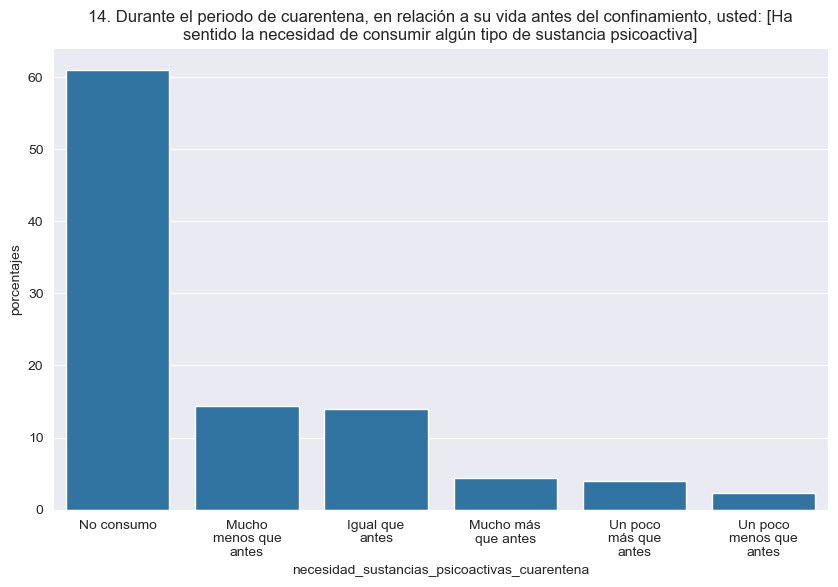

In [48]:
show_distribution(28)


Nombre de variable: apoyo_pareja_cuarentena
5 Todo el que necesito: 40.71%
1 Nada: 28.33%
4: 15.33%
3: 12.07%
2: 3.56%


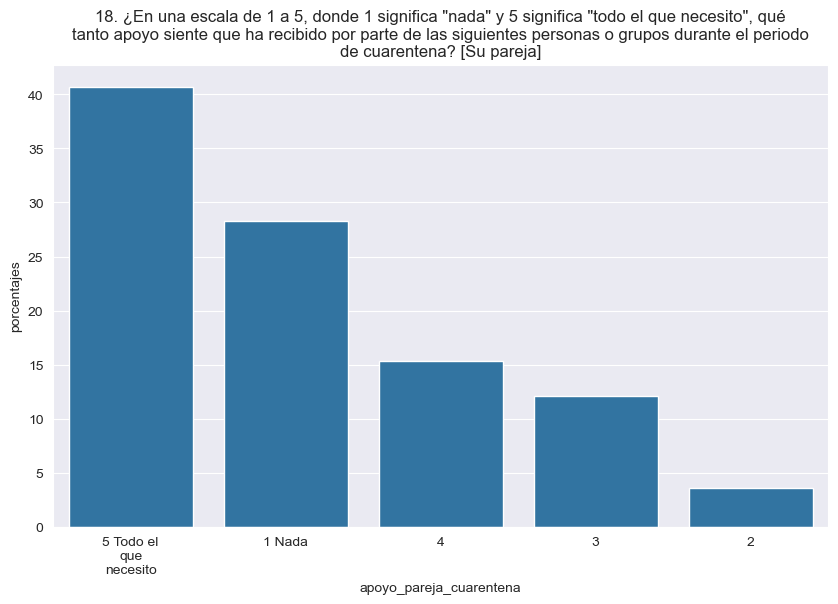

In [49]:
show_distribution(30)


Nombre de variable: apoyo_familia_cuarentena
5 Todo el que necesito: 43.81%
4: 26.63%
3: 16.87%
2: 8.20%
1 Nada: 4.49%


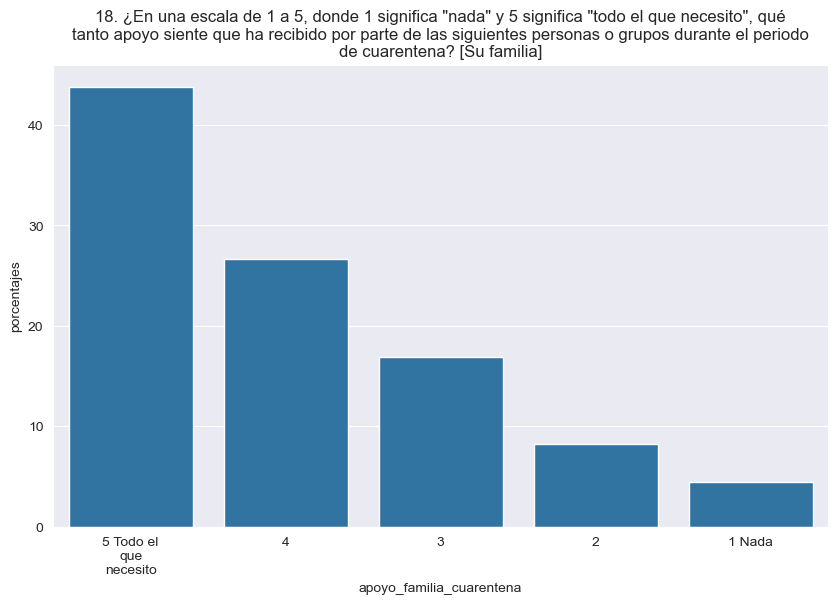

In [50]:
show_distribution(31)


Nombre de variable: apoyo_amigos_cuarentena
4: 25.23%
3: 25.08%
5 Todo el que necesito: 22.76%
2: 14.55%
1 Nada: 12.38%


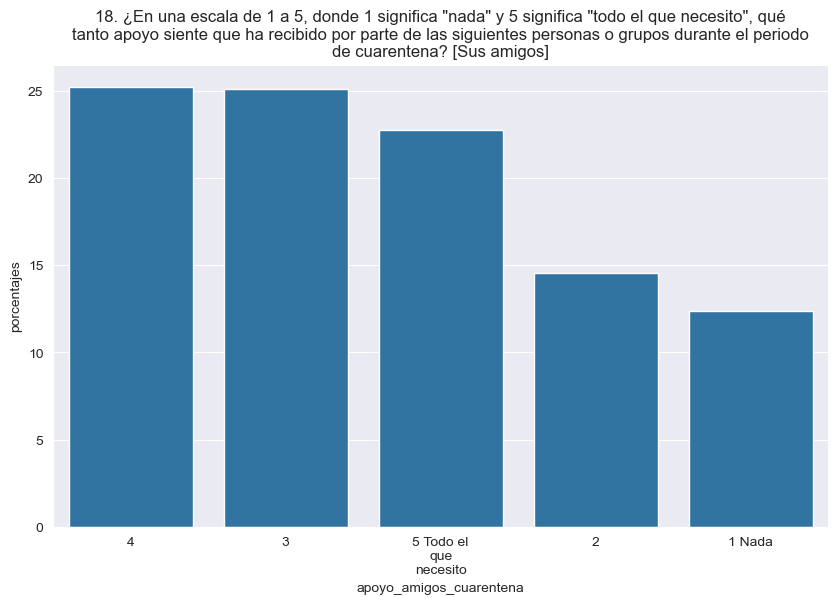

In [51]:
show_distribution(32)


Nombre de variable: apoyo_empleador_entidad_educativa_cuarentena
1 Nada: 27.71%
5 Todo el que necesito: 22.14%
4: 20.28%
3: 16.41%
2: 13.47%


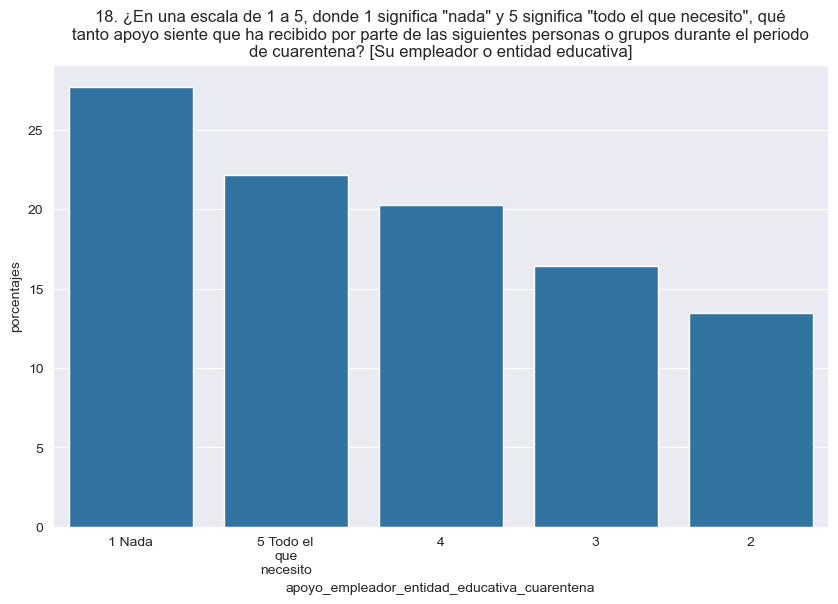

In [52]:
show_distribution(33)


Nombre de variable: apoyo_vecinos_cuarentena
1 Nada: 53.87%
3: 18.89%
2: 16.87%
4: 7.89%
5 Todo el que necesito: 2.48%


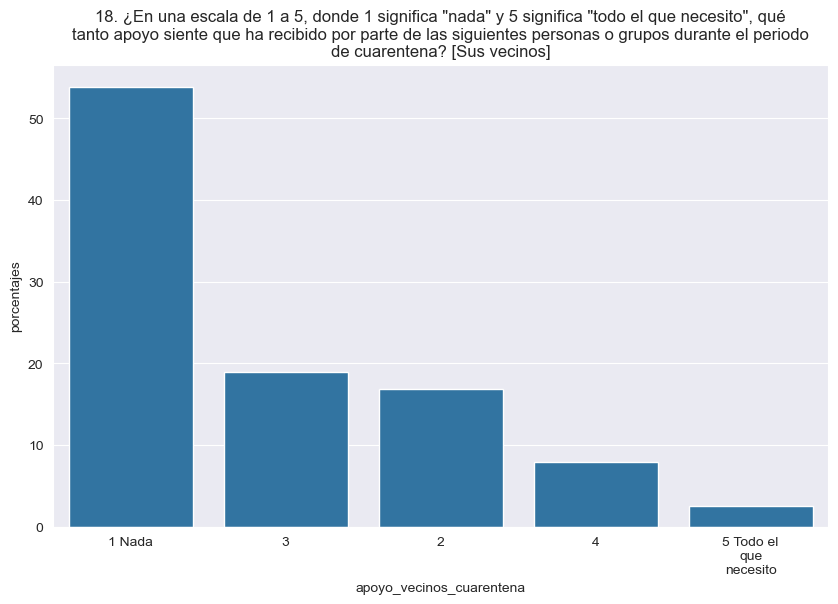

In [53]:
show_distribution(34)


Nombre de variable: apoyo_alcaldia_cuarentena
1 Nada: 39.63%
3: 22.45%
4: 15.94%
2: 15.02%
5 Todo el que necesito: 6.97%


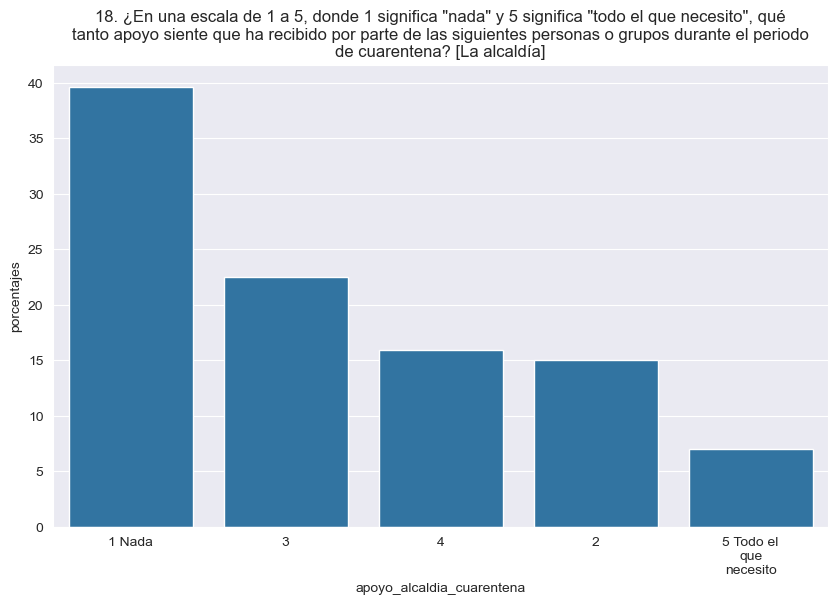

In [54]:
show_distribution(35)


Nombre de variable: apoyo_gobierno_nacional_cuarentena
1 Nada: 54.33%
2: 20.90%
3: 15.17%
4: 6.35%
5 Todo el que necesito: 3.25%


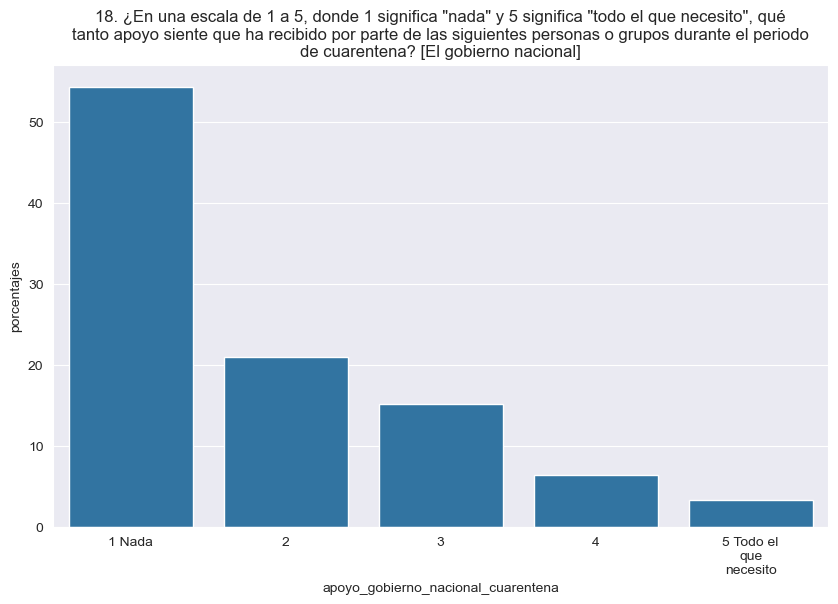

In [55]:
show_distribution(36)


Nombre de variable: sexo
Mujer: 72.29%
Hombre: 26.47%
Prefiero no decirlo: 0.62%
No binario: 0.62%


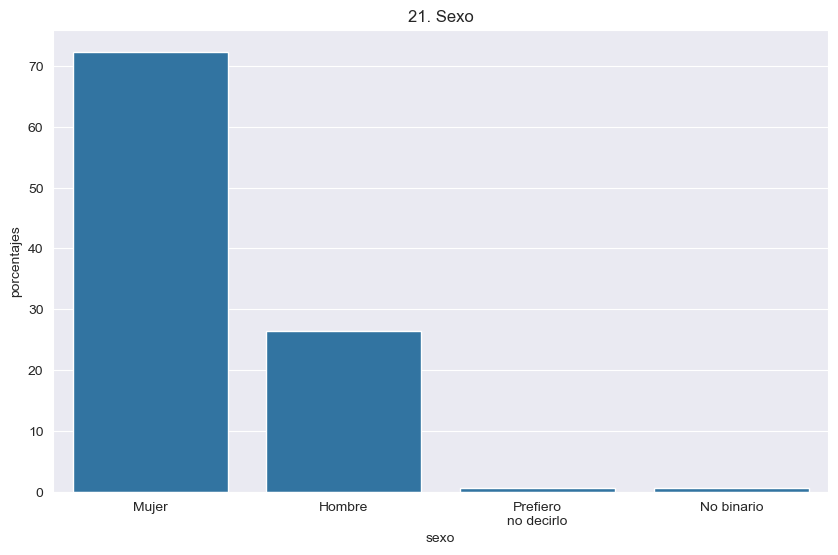

In [56]:
show_distribution(37)


Nombre de variable: rango_edad
De 46 a 59: 30.80%
De 26 a 35: 25.39%
De 36 a 45: 21.83%
De 15 a 25: 16.56%
Mayor de 60: 5.42%


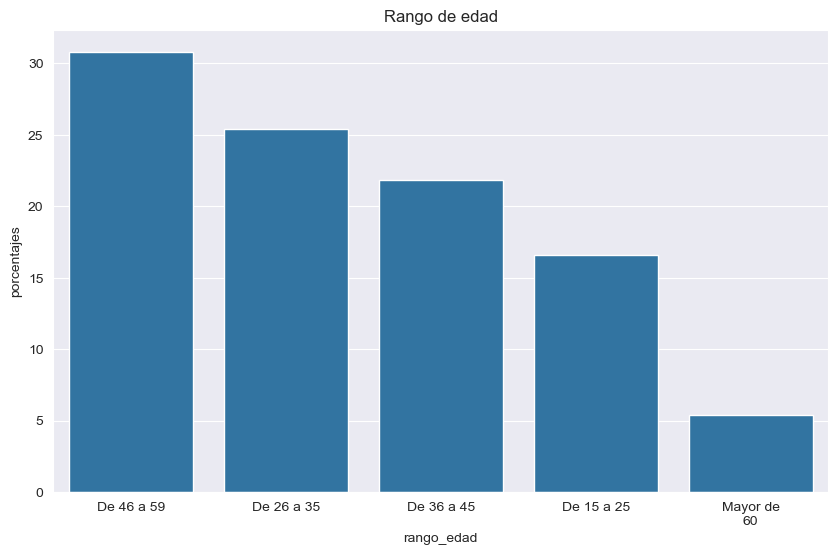

In [57]:
show_distribution(39)


Nombre de variable: diagnostico_enfermedades
Sí: 86.38%
No: 11.76%
No está seguro: 1.86%


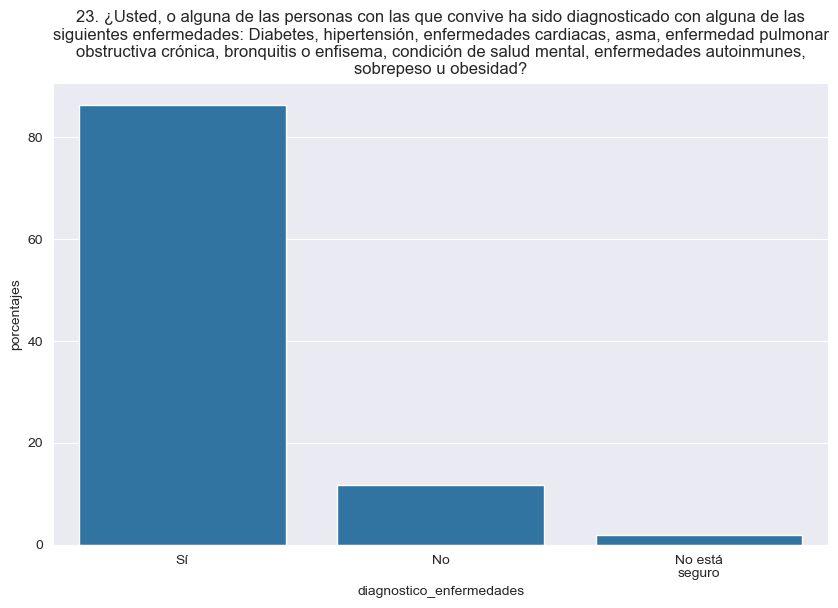

In [58]:
show_distribution(40)


Nombre de variable: nivel_educativo
Título de posgrado: 37.15%
Título universitario: 28.95%
Título técnico o tecnológico: 17.96%
Secundaria completa: 12.69%
Secundaria incompleta: 2.63%
Primaria incompleta: 0.46%
Primaria completa: 0.15%


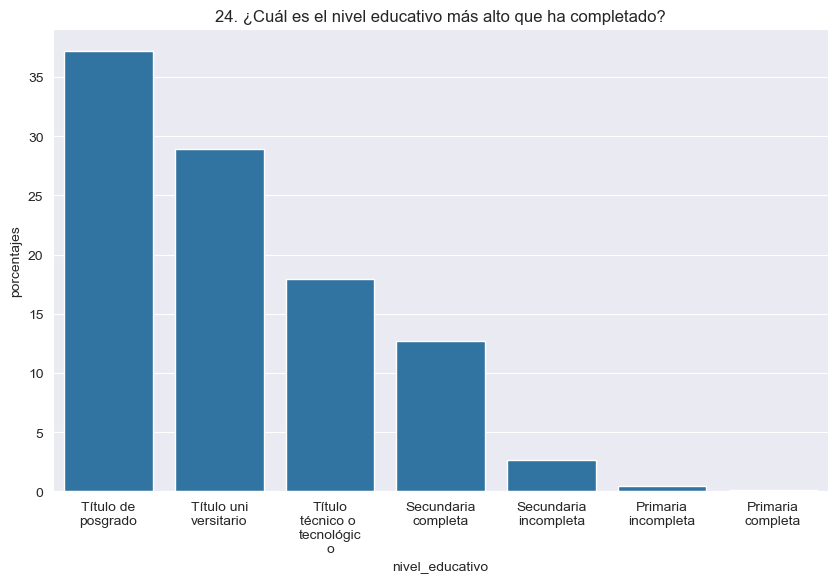

In [59]:
show_distribution(41)

In [60]:
df['localidad_residencia'].value_counts(normalize=True) * 100

localidad_residencia
Suba                   14.860681
Kennedy                14.705882
Engativá               13.157895
Usaquén                 8.513932
Fontibón                8.359133
Teusaquillo             6.037152
Puente Aranda           3.715170
Barrios Unidos          3.405573
No reside en Bogotá     3.250774
Chapinero               3.095975
Bosa                    2.941176
San Cristóbal           2.786378
Rafael Uribe Uribe      2.631579
Ciudad Bolívar          2.476780
Santa Fe                2.321981
Tunjuelito              2.012384
Usme                    1.857585
Antonio Nariño          1.857585
La Candelaria           1.083591
No sabe                 0.464396
Los Mártires            0.309598
Sumapaz                 0.154799
Name: proportion, dtype: float64


Nombre de variable: condiciones_vivienda_tranquilidad_comodidad
Sí: 84.06%
No: 15.94%


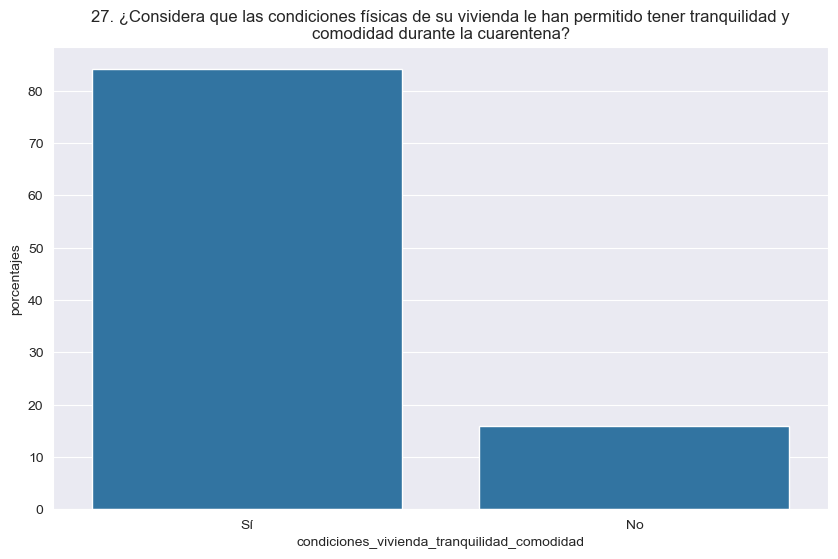

In [61]:
show_distribution(44)


Nombre de variable: num_personas_hogar
Tres: 26.93%
Cuatro: 22.60%
Dos: 18.58%
Seis o más: 13.31%
Cinco: 12.54%
Una (vivo solo): 6.04%


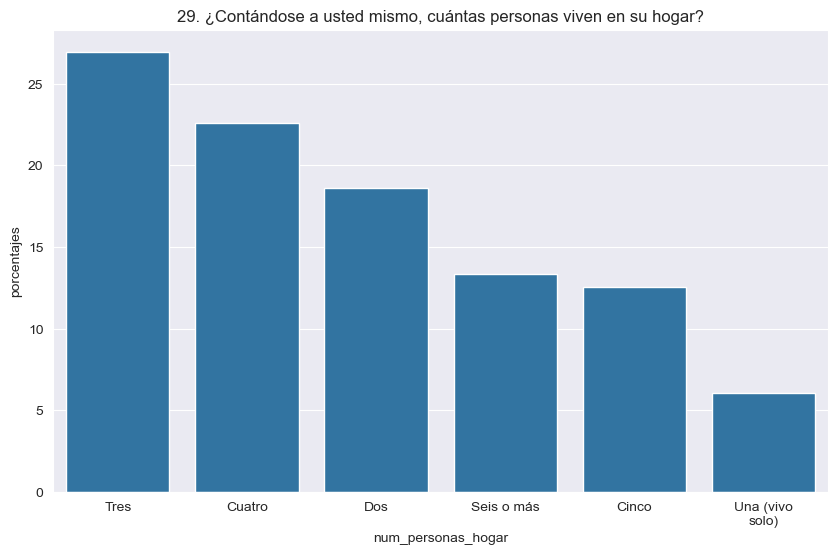

In [62]:
show_distribution(45)


Nombre de variable: num_personas_5_menos
Ninguna: 86.07%
Una: 11.61%
Dos: 1.39%
Tres: 0.46%
Cinco: 0.31%
Seis o más: 0.15%


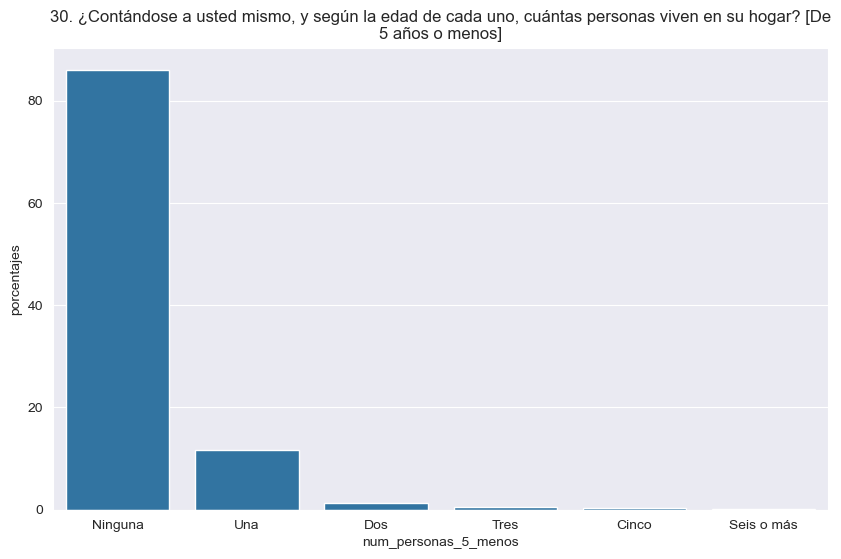

In [63]:
show_distribution(46)


Nombre de variable: num_personas_6_18
Ninguna: 63.62%
Una: 24.61%
Dos: 8.05%
Tres: 2.94%
Cuatro: 0.31%
Cinco: 0.31%
Seis o más: 0.15%


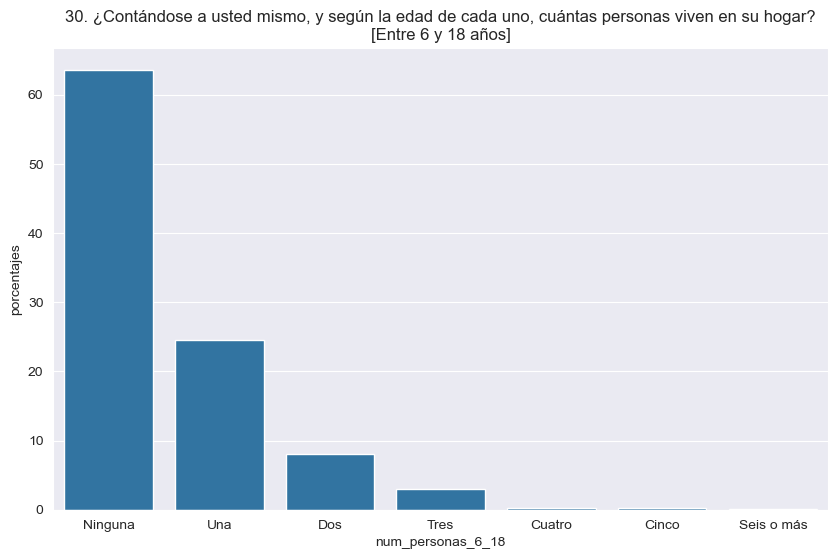

In [64]:
show_distribution(47)


Nombre de variable: num_personas_19_64
Dos: 39.16%
Tres: 24.15%
Una: 14.86%
Cuatro: 11.92%
Cinco: 4.80%
Seis o más: 3.25%
Ninguna: 1.86%


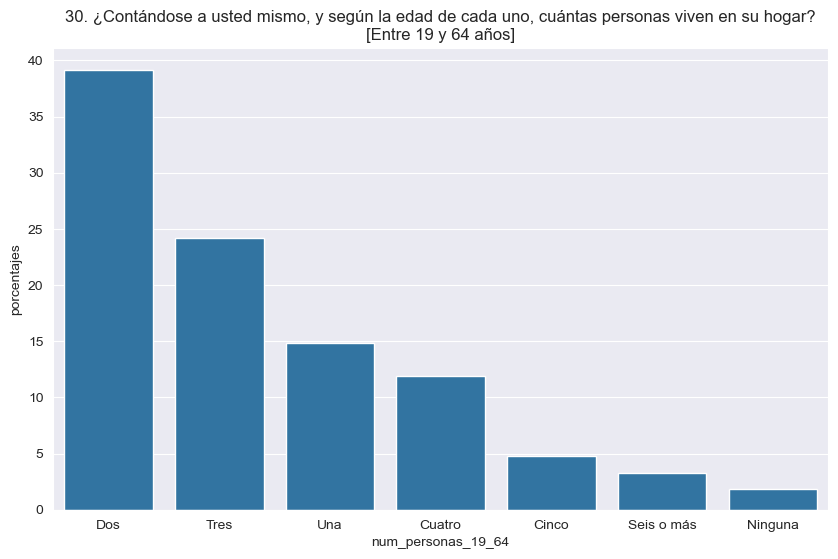

In [65]:
show_distribution(48)


Nombre de variable: num_personas_65_mas
Ninguna: 70.12%
Una: 17.80%
Dos: 8.67%
Tres: 1.55%
Cuatro: 0.77%
Seis o más: 0.62%
Cinco: 0.46%


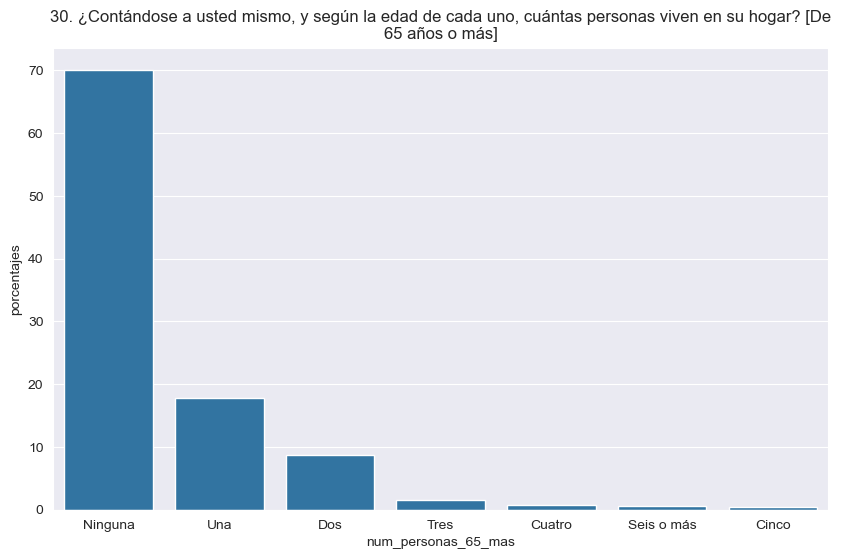

In [66]:
show_distribution(49)


Nombre de variable: oportunidad_expresar_sentimientos
Sí: 63.16%
No: 36.84%


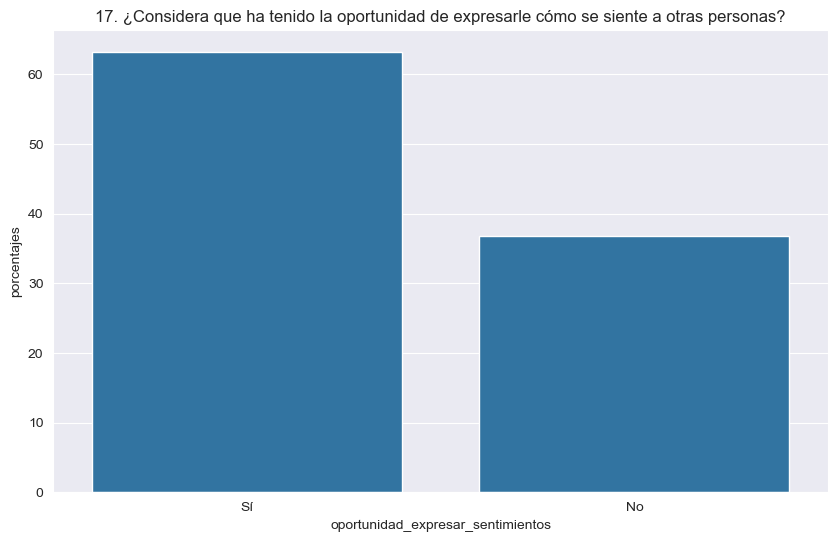

In [67]:
show_distribution(50)


Nombre de variable: frecuencia_actividad_fisica_mes
Ninguna vez: 33.44%
Más de una vez a la semana: 31.27%
Menos de una vez a la semana: 21.52%
Una vez a la semana: 13.78%


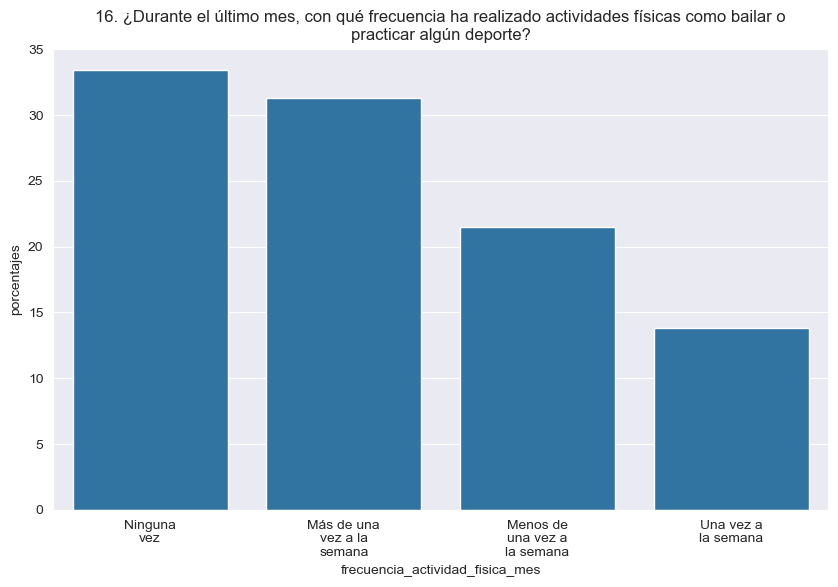

In [68]:
show_distribution(51)

In [69]:
df['exposicion_violencia_hogar'].value_counts(normalize=True) * 100

exposicion_violencia_hogar
1.0    67.182663
2.0    15.015480
3.0     8.049536
4.0     5.417957
5.0     4.334365
Name: proportion, dtype: float64


Nombre de variable: diagnostico_salud_mental
Sí: 100.00%


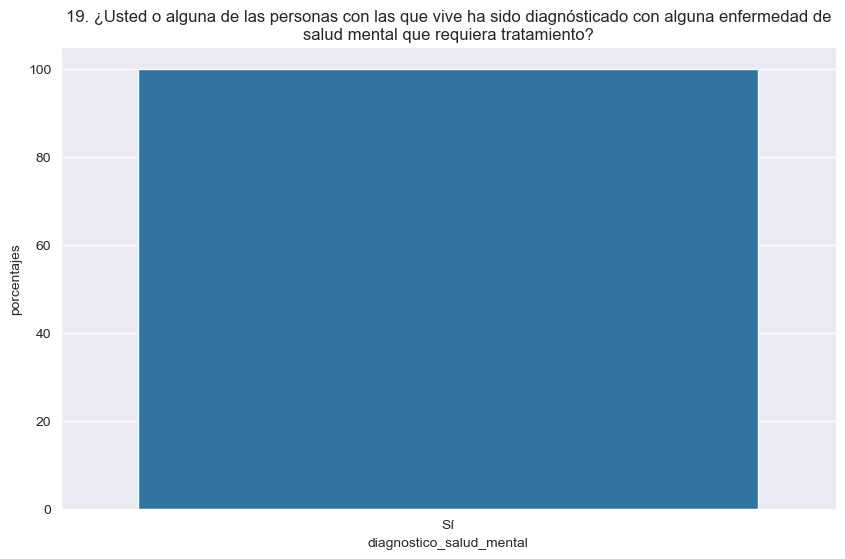

In [70]:
show_distribution(53)


Nombre de variable: continuidad_tratamiento_salud_mental
Sí: 46.44%
No: 39.47%
No está seguro: 8.67%
No aplica: 5.42%


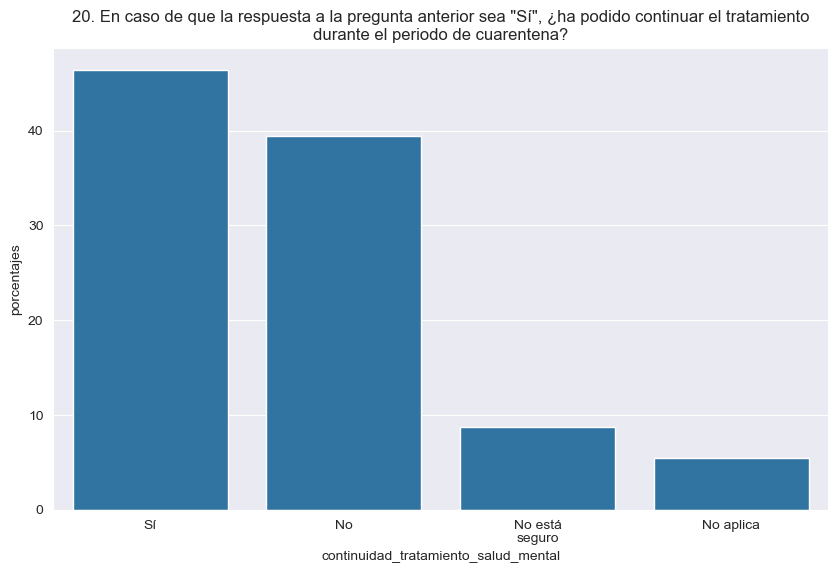

In [71]:
show_distribution(54)